In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np

In [3]:
datasus = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv",
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",",engine='python')

In [4]:
datasus.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,...,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,1.195865e+10
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,...,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2.172158e+09
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,...,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2.036924e+09
25,52 Goiás,-,-,-,-,-,-,-,-,-,...,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4.657349e+09
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,...,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2.429933e+09


In [5]:
datasus.mean()

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Abr    4.000568e+07
2020/Mai    4.676903e+07
2020/Jun    4.536735e+07
2020/Jul    4.071708e+07
Total       5.993724e+09
Length: 157, dtype: float64

In [6]:
pd.options.display.float_format = "{:.2f}".format

In [7]:
datasus['Unidade da Federação'] = datasus['Unidade da Federação'].str.replace('\d+.','')

In [8]:
datasus = datasus.set_index('Unidade da Federação')

In [9]:
datasus_T = datasus.T

In [10]:
datasus_T = datasus_T[:-1]

In [11]:
datasus_T = datasus_T.iloc[138:]

In [12]:
datasus_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 2009/Jan to 2020/Ago
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Rondônia             140 non-null    object
 1   Acre                 140 non-null    object
 2   Amazonas             140 non-null    object
 3   Roraima              140 non-null    object
 4   Pará                 140 non-null    object
 5   Amapá                140 non-null    object
 6   Tocantins            140 non-null    object
 7   Maranhão             140 non-null    object
 8   Piauí                140 non-null    object
 9   Ceará                140 non-null    object
 10  Rio Grande do Norte  140 non-null    object
 11  Paraíba              140 non-null    object
 12  Pernambuco           140 non-null    object
 13  Alagoas              140 non-null    object
 14  Sergipe              140 non-null    object
 15  Bahia                140 non-null    object
 16  M

In [13]:
datasus_T = datasus_T.apply(lambda x: x.replace('-','0'))

In [14]:
datasus_T = datasus_T.apply(pd.to_numeric)

In [15]:
datasus_mais_recente = datasus_T.iloc[-1]

In [16]:
datasus_mais_recente_pct = datasus_mais_recente / datasus_mais_recente.sum()

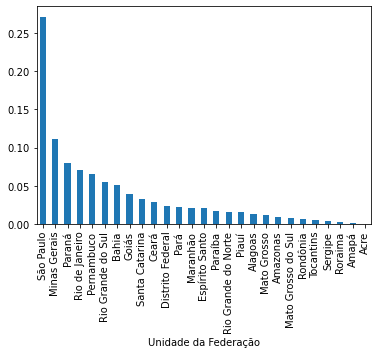

In [17]:
datasus_mais_recente_pct.sort_values(ascending=False).plot(kind='bar')

#### Get population data from IBGE - Wikipedia

In [18]:
def get_data_from_ibge_join_cols(df):
    """ This function gets the population from each state in Brazil from wikipedia 'Lista de unidades federativas do brasil'
    Transform the data and join it with the dataframe passed on."""
    
    ibge = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
    ibge = pd.DataFrame(ibge[0])
    ibge = ibge[['Unidade federativa','População']]
    
    #transformaçao nome Coluna e set do indice
    ibge = ibge.rename(columns={'População':'populacao','Unidade federativa':'uf'})
    ibge['uf'] = ibge['uf'].str.strip()
    ibge.set_index('uf', inplace = True)
    
    #Transformando coluna populacao em int64
    ibge['populacao'] = ibge['populacao'].apply(lambda x: x.replace(' ','')).apply(pd.to_numeric)

    return ibge.join(df)
    
    
    

In [19]:
populacao_datos_mais_recentes = get_data_from_ibge_join_cols(datasus_mais_recente)

In [20]:
populacao_datos_mais_recentes.head()

,populacao,2020/Ago
uf,,
São Paulo,46289333,140414944.95
Minas Gerais,21331292,57473699.06
Rio de Janeiro,17366189,36264322.65
Bahia,14930634,26023558.53
Paraná,11516840,41542401.16
